<a href="https://colab.research.google.com/github/narendra974/insidedeeplearning/blob/main/FC_Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Fully Connected Networks

To implement any kind of neural network in PyTorch we must phrase the problem as an optimization problem (function minimization)

1. Input Data and labels are feed into the process.
2. Output of the model is used with the true label to compute a loss.
3. quantifying how bad the model is doing with the loss function.
4. Compute the gradient of loss with each parameter. 
5. Update the parameters with the gradients calculated.



Function Minimization Problem

Alterthe parameters 'Theta' to minimize the error/lossof the neural network's prediction against the correct predictions over the entire dataset.

Parameter Learning Rule(Gradient Descent)

The new parameters Theta(k+1) are equal to the old parameters minus the gradient with respect to the old parameters of the error/loss of the neural networks prediction against the correct predictions averaged over the entire dataset and down-weighted by the learning rate.

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import *
from tqdm.autonotebook import tqdm

In [ ]:
def moveTo(obj, device):
  if isinstance(obj, list):
    return [moveTo(x, device) for x in obj]
  elif isinstance(obj, tuple):
    return tuple(moveTo(list(obj), device))
  elif isinstance(obj, set):
    return set(moveTo(list(obj), device))
  elif isinstance(obj, dict):
    to_ret = dect()
    for key, value in obj.items():
      to_ret[moveTo(key, device)] = moveTo(value,device)
  elif hasattr(obj,"to"):
    return obj.to(device)
  else:
    return object

In [ ]:
def train_simple_network(model, loss_fun, training_loader, epochs=20, device="cuda"):
  optimizer = torch.optim.SGD(model.parameters(), lr=0.001) # Learning rate to be provided.
  model.to(device)
  for epoch in tqdm(range(epochs), desc="Epoch"):
    model = model.train()  # put the model to train
    running_loss = 0.0
    for inputs, labels in tqdm(training_loader, desc='Batch', leave=False):
      inputs = moveTo(inputs, device)
      labels = moveTo(labels, device)
      optimizer.zero_grad() # remove old information from previous iteration.
      predicted_labels = model(inputs)
      loss = loss_fun(labels, predicted_labels)
      loss.backward() # for computing the gradients. 
      optimizer.step()   # Update the parameters. 
      running_loss = running_loss + loss.item()

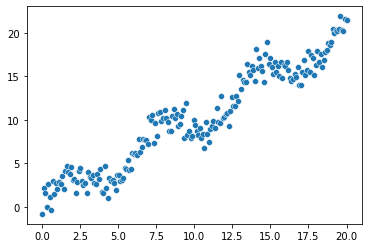

In [ ]:
# Creation of 1-dimensional data set.
import  numpy as np
import seaborn as sns

X = np.linspace(0, 20, num=200)
y = X + np.sin(X)*2 + np.random.normal(size=X.shape)
sns.scatterplot(x=X, y=y)


In [ ]:
class Simple1DRegressionDataset(Dataset):
  
  def __init__(self, X, y):
    super(Simple1DRegressionDataset, self).__init__()
    self.X = X.reshape(-1, 1)
    self.y = y.reshape(-1, 1)

  def __getitem__(self, index):
    return torch.tensor(self.X[index,:], dtype=torch.float32), torch.tensor(self.y[index], dtype=torch.float32)

  def __len__(self):
    return self.X.shape[0]

training_loader = DataLoader(Simple1DRegressionDataset(X, y), shuffle=True)

In [ ]:
in_features=1
out_features=1
model = nn.Linear(in_features, out_features)
loss_func = nn.MSELoss()
device = torch.device("cuda")

train_simple_network(model, loss_func,  training_loader, epochs=20, device=device)

Epoch:   0%|          | 0/20 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

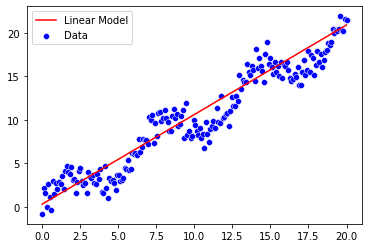

In [ ]:
with torch.no_grad():
  Y_pred = model(torch.tensor(X.reshape(-1,1), device=device, dtype=torch.float32)).cpu().numpy()

sns.scatterplot(x=X, y=y, color='blue', label='Data')
sns.lineplot(x=X, y=Y_pred.ravel(),color='red', label='Linear Model')

Adding Non-Linearities between Linear Layers. 
Plotting sigmoid and tanh functions.

Text(0, 0.5, 'Activation')

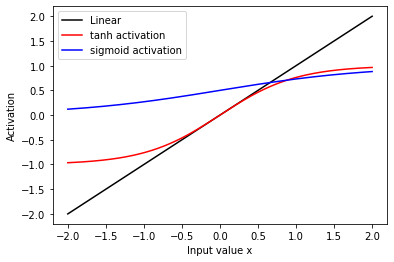

In [ ]:
activation_input = np.linspace(-2, 2, num=200)
tanh_activation = np.tanh(activation_input)
sigmoid_activation = np.exp(activation_input) / (np.exp(activation_input) + 1)
sns.lineplot(x=activation_input, y=activation_input, color='black', label='Linear')
sns.lineplot(x=activation_input, y=tanh_activation, color='red', label='tanh activation')
ax = sns.lineplot(x=activation_input, y=sigmoid_activation, color='blue', label='sigmoid activation')
ax.set_xlabel('Input value x')
ax.set_ylabel('Activation')

Epoch:   0%|          | 0/20 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

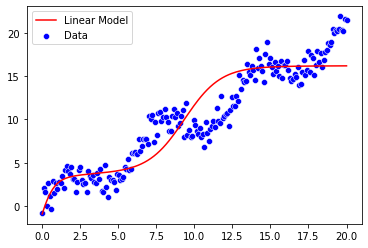

In [ ]:
import torch.nn as nn

model = nn.Sequential(
    nn.Linear(1, 10),
    nn.Tanh(),
    nn.Linear(10, 1)
)

train_simple_network(model, loss_func, training_loader, 20, device=device)

with torch.no_grad():
  Y_pred = model(torch.tensor(X.reshape(-1,1), device=device, dtype=torch.float32)).cpu().numpy()

sns.scatterplot(x=X, y=y, color='blue', label='Data')
sns.lineplot(x=X, y=Y_pred.ravel(),color='red', label='Linear Model')

Classification Problem

Generating Dataset for Classification Problem

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(200, 2)
(200,)


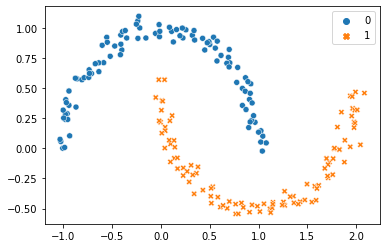

In [ ]:
from sklearn.datasets import make_moons
x, y = make_moons(n_samples=200, noise=0.05)
sns.scatterplot(x[:,0], x[:, 1], hue=y, style=y)
print(x.shape)
print(y.shape)

we shall use the builtin tensorobject TensorDataset object to wrap our currentdata, this works only when we can fill our entire data into RAM. 

In [92]:
from torch._C import dtype
classification_dataset = torch.utils.data.TensorDataset(torch.tensor(x, dtype=torch.float32), torch.tensor(F.one_hot(torch.as_tensor(y), num_classes=2), dtype=torch.float32))
data_loader = DataLoader(classification_dataset)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  


Softmax and CrossEntropy are the two components that are necessary for logistic regression. 

Softmax: Softmax converts everything to a non-negative number and ensures sum of the probabilities to 1. Each value contributes to the final answer.
Dot product of the probabilities with the original numbers results in the original number. 


Cross Entropy: How two distributions are different from each other. 

In [ ]:
in_features = 2
out_features= 2

model = nn.Linear(in_features, out_features)
loss_function = nn.CrossEntropyLoss()
train_simple_network(model, loss_fun=loss_function, training_loader=data_loader, epochs=50)

Epoch:   0%|          | 0/50 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

torch.Size([1, 2])
torch.float32
tensor([[-0.0133,  0.6123]], device='cuda:0', grad_fn=<AddmmBackward0>)
<class 'torch.Tensor'>
torch.Size([1, 2])
torch.float32
tensor([[0., 1.]], device='cuda:0')
<class 'torch.Tensor'>
torch.Size([1, 2])
torch.float32
tensor([[0.4937, 0.0227]], device='cuda:0', grad_fn=<AddmmBackward0>)
<class 'torch.Tensor'>
torch.Size([1, 2])
torch.float32
tensor([[1., 0.]], device='cuda:0')
<class 'torch.Tensor'>
torch.Size([1, 2])
torch.float32
tensor([[-0.6012,  1.2508]], device='cuda:0', grad_fn=<AddmmBackward0>)
<class 'torch.Tensor'>
torch.Size([1, 2])
torch.float32
tensor([[0., 1.]], device='cuda:0')
<class 'torch.Tensor'>
torch.Size([1, 2])
torch.float32
tensor([[-0.2570,  0.9813]], device='cuda:0', grad_fn=<AddmmBackward0>)
<class 'torch.Tensor'>
torch.Size([1, 2])
torch.float32
tensor([[0., 1.]], device='cuda:0')
<class 'torch.Tensor'>
torch.Size([1, 2])
torch.float32
tensor([[-0.1030,  0.5280]], device='cuda:0', grad_fn=<AddmmBackward0>)
<class 'torch.Ten

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

torch.Size([1, 2])
torch.float32
tensor([[-0.2111,  0.4550]], device='cuda:0', grad_fn=<AddmmBackward0>)
<class 'torch.Tensor'>
torch.Size([1, 2])
torch.float32
tensor([[0., 1.]], device='cuda:0')
<class 'torch.Tensor'>
torch.Size([1, 2])
torch.float32
tensor([[ 0.4680, -0.1133]], device='cuda:0', grad_fn=<AddmmBackward0>)
<class 'torch.Tensor'>
torch.Size([1, 2])
torch.float32
tensor([[1., 0.]], device='cuda:0')
<class 'torch.Tensor'>
torch.Size([1, 2])
torch.float32
tensor([[-0.9799,  1.0648]], device='cuda:0', grad_fn=<AddmmBackward0>)
<class 'torch.Tensor'>
torch.Size([1, 2])
torch.float32
tensor([[0., 1.]], device='cuda:0')
<class 'torch.Tensor'>
torch.Size([1, 2])
torch.float32
tensor([[-0.5751,  0.8238]], device='cuda:0', grad_fn=<AddmmBackward0>)
<class 'torch.Tensor'>
torch.Size([1, 2])
torch.float32
tensor([[0., 1.]], device='cuda:0')
<class 'torch.Tensor'>
torch.Size([1, 2])
torch.float32
tensor([[-0.2532,  0.3485]], device='cuda:0', grad_fn=<AddmmBackward0>)
<class 'torch.T

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

torch.Size([1, 2])
torch.float32
tensor([[-0.4089,  0.2977]], device='cuda:0', grad_fn=<AddmmBackward0>)
<class 'torch.Tensor'>
torch.Size([1, 2])
torch.float32
tensor([[0., 1.]], device='cuda:0')
<class 'torch.Tensor'>
torch.Size([1, 2])
torch.float32
tensor([[ 0.4422, -0.2493]], device='cuda:0', grad_fn=<AddmmBackward0>)
<class 'torch.Tensor'>
torch.Size([1, 2])
torch.float32
tensor([[1., 0.]], device='cuda:0')
<class 'torch.Tensor'>
torch.Size([1, 2])
torch.float32
tensor([[-1.3585,  0.8787]], device='cuda:0', grad_fn=<AddmmBackward0>)
<class 'torch.Tensor'>
torch.Size([1, 2])
torch.float32
tensor([[0., 1.]], device='cuda:0')
<class 'torch.Tensor'>
torch.Size([1, 2])
torch.float32
tensor([[-0.8933,  0.6662]], device='cuda:0', grad_fn=<AddmmBackward0>)
<class 'torch.Tensor'>
torch.Size([1, 2])
torch.float32
tensor([[0., 1.]], device='cuda:0')
<class 'torch.Tensor'>
torch.Size([1, 2])
torch.float32
tensor([[-0.4034,  0.1691]], device='cuda:0', grad_fn=<AddmmBackward0>)
<class 'torch.T

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

torch.Size([1, 2])
torch.float32
tensor([[-0.6067,  0.1404]], device='cuda:0', grad_fn=<AddmmBackward0>)
<class 'torch.Tensor'>
torch.Size([1, 2])
torch.float32
tensor([[0., 1.]], device='cuda:0')
<class 'torch.Tensor'>
torch.Size([1, 2])
torch.float32
tensor([[ 0.4165, -0.3854]], device='cuda:0', grad_fn=<AddmmBackward0>)
<class 'torch.Tensor'>
torch.Size([1, 2])
torch.float32
tensor([[1., 0.]], device='cuda:0')
<class 'torch.Tensor'>
torch.Size([1, 2])
torch.float32
tensor([[-1.7371,  0.6926]], device='cuda:0', grad_fn=<AddmmBackward0>)
<class 'torch.Tensor'>
torch.Size([1, 2])
torch.float32
tensor([[0., 1.]], device='cuda:0')
<class 'torch.Tensor'>
torch.Size([1, 2])
torch.float32
tensor([[-1.2114,  0.5086]], device='cuda:0', grad_fn=<AddmmBackward0>)
<class 'torch.Tensor'>
torch.Size([1, 2])
torch.float32
tensor([[0., 1.]], device='cuda:0')
<class 'torch.Tensor'>
torch.Size([1, 2])
torch.float32
tensor([[-0.5535, -0.0104]], device='cuda:0', grad_fn=<AddmmBackward0>)
<class 'torch.T

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

torch.Size([1, 2])
torch.float32
tensor([[-0.8045, -0.0168]], device='cuda:0', grad_fn=<AddmmBackward0>)
<class 'torch.Tensor'>
torch.Size([1, 2])
torch.float32
tensor([[0., 1.]], device='cuda:0')
<class 'torch.Tensor'>
torch.Size([1, 2])
torch.float32
tensor([[ 0.3907, -0.5214]], device='cuda:0', grad_fn=<AddmmBackward0>)
<class 'torch.Tensor'>
torch.Size([1, 2])
torch.float32
tensor([[1., 0.]], device='cuda:0')
<class 'torch.Tensor'>
torch.Size([1, 2])
torch.float32
tensor([[-2.1157,  0.5066]], device='cuda:0', grad_fn=<AddmmBackward0>)
<class 'torch.Tensor'>
torch.Size([1, 2])
torch.float32
tensor([[0., 1.]], device='cuda:0')
<class 'torch.Tensor'>
torch.Size([1, 2])
torch.float32
tensor([[-1.5295,  0.3511]], device='cuda:0', grad_fn=<AddmmBackward0>)
<class 'torch.Tensor'>
torch.Size([1, 2])
torch.float32
tensor([[0., 1.]], device='cuda:0')
<class 'torch.Tensor'>
torch.Size([1, 2])
torch.float32
tensor([[-0.7037, -0.1899]], device='cuda:0', grad_fn=<AddmmBackward0>)
<class 'torch.T

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

torch.Size([1, 2])
torch.float32
tensor([[-1.0023, -0.1741]], device='cuda:0', grad_fn=<AddmmBackward0>)
<class 'torch.Tensor'>
torch.Size([1, 2])
torch.float32
tensor([[0., 1.]], device='cuda:0')
<class 'torch.Tensor'>
torch.Size([1, 2])
torch.float32
tensor([[ 0.3650, -0.6575]], device='cuda:0', grad_fn=<AddmmBackward0>)
<class 'torch.Tensor'>
torch.Size([1, 2])
torch.float32
tensor([[1., 0.]], device='cuda:0')
<class 'torch.Tensor'>
torch.Size([1, 2])
torch.float32
tensor([[-2.4943,  0.3205]], device='cuda:0', grad_fn=<AddmmBackward0>)
<class 'torch.Tensor'>
torch.Size([1, 2])
torch.float32
tensor([[0., 1.]], device='cuda:0')
<class 'torch.Tensor'>
torch.Size([1, 2])
torch.float32
tensor([[-1.8476,  0.1935]], device='cuda:0', grad_fn=<AddmmBackward0>)
<class 'torch.Tensor'>
torch.Size([1, 2])
torch.float32
tensor([[0., 1.]], device='cuda:0')
<class 'torch.Tensor'>
torch.Size([1, 2])
torch.float32
tensor([[-0.8539, -0.3694]], device='cuda:0', grad_fn=<AddmmBackward0>)
<class 'torch.T

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

torch.Size([1, 2])
torch.float32
tensor([[-1.2001, -0.3314]], device='cuda:0', grad_fn=<AddmmBackward0>)
<class 'torch.Tensor'>
torch.Size([1, 2])
torch.float32
tensor([[0., 1.]], device='cuda:0')
<class 'torch.Tensor'>
torch.Size([1, 2])
torch.float32
tensor([[ 0.3393, -0.7935]], device='cuda:0', grad_fn=<AddmmBackward0>)
<class 'torch.Tensor'>
torch.Size([1, 2])
torch.float32
tensor([[1., 0.]], device='cuda:0')
<class 'torch.Tensor'>
torch.Size([1, 2])
torch.float32
tensor([[-2.8730,  0.1344]], device='cuda:0', grad_fn=<AddmmBackward0>)
<class 'torch.Tensor'>
torch.Size([1, 2])
torch.float32
tensor([[0., 1.]], device='cuda:0')
<class 'torch.Tensor'>
torch.Size([1, 2])
torch.float32
tensor([[-2.1658,  0.0359]], device='cuda:0', grad_fn=<AddmmBackward0>)
<class 'torch.Tensor'>
torch.Size([1, 2])
torch.float32
tensor([[0., 1.]], device='cuda:0')
<class 'torch.Tensor'>
torch.Size([1, 2])
torch.float32
tensor([[-1.0041, -0.5489]], device='cuda:0', grad_fn=<AddmmBackward0>)
<class 'torch.T

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

torch.Size([1, 2])
torch.float32
tensor([[-1.3979, -0.4887]], device='cuda:0', grad_fn=<AddmmBackward0>)
<class 'torch.Tensor'>
torch.Size([1, 2])
torch.float32
tensor([[0., 1.]], device='cuda:0')
<class 'torch.Tensor'>
torch.Size([1, 2])
torch.float32
tensor([[ 0.3135, -0.9296]], device='cuda:0', grad_fn=<AddmmBackward0>)
<class 'torch.Tensor'>
torch.Size([1, 2])
torch.float32
tensor([[1., 0.]], device='cuda:0')
<class 'torch.Tensor'>
torch.Size([1, 2])
torch.float32
tensor([[-3.2516, -0.0516]], device='cuda:0', grad_fn=<AddmmBackward0>)
<class 'torch.Tensor'>
torch.Size([1, 2])
torch.float32
tensor([[0., 1.]], device='cuda:0')
<class 'torch.Tensor'>
torch.Size([1, 2])
torch.float32
tensor([[-2.4839, -0.1216]], device='cuda:0', grad_fn=<AddmmBackward0>)
<class 'torch.Tensor'>
torch.Size([1, 2])
torch.float32
tensor([[0., 1.]], device='cuda:0')
<class 'torch.Tensor'>
torch.Size([1, 2])
torch.float32
tensor([[-1.1543, -0.7284]], device='cuda:0', grad_fn=<AddmmBackward0>)
<class 'torch.T

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

torch.Size([1, 2])
torch.float32
tensor([[-1.5957, -0.6460]], device='cuda:0', grad_fn=<AddmmBackward0>)
<class 'torch.Tensor'>
torch.Size([1, 2])
torch.float32
tensor([[0., 1.]], device='cuda:0')
<class 'torch.Tensor'>
torch.Size([1, 2])
torch.float32
tensor([[ 0.2878, -1.0656]], device='cuda:0', grad_fn=<AddmmBackward0>)
<class 'torch.Tensor'>
torch.Size([1, 2])
torch.float32
tensor([[1., 0.]], device='cuda:0')
<class 'torch.Tensor'>
torch.Size([1, 2])
torch.float32
tensor([[-3.6302, -0.2377]], device='cuda:0', grad_fn=<AddmmBackward0>)
<class 'torch.Tensor'>
torch.Size([1, 2])
torch.float32
tensor([[0., 1.]], device='cuda:0')
<class 'torch.Tensor'>
torch.Size([1, 2])
torch.float32
tensor([[-2.8020, -0.2792]], device='cuda:0', grad_fn=<AddmmBackward0>)
<class 'torch.Tensor'>
torch.Size([1, 2])
torch.float32
tensor([[0., 1.]], device='cuda:0')
<class 'torch.Tensor'>
torch.Size([1, 2])
torch.float32
tensor([[-1.3044, -0.9079]], device='cuda:0', grad_fn=<AddmmBackward0>)
<class 'torch.T

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

torch.Size([1, 2])
torch.float32
tensor([[-1.7935, -0.8032]], device='cuda:0', grad_fn=<AddmmBackward0>)
<class 'torch.Tensor'>
torch.Size([1, 2])
torch.float32
tensor([[0., 1.]], device='cuda:0')
<class 'torch.Tensor'>
torch.Size([1, 2])
torch.float32
tensor([[ 0.2620, -1.2017]], device='cuda:0', grad_fn=<AddmmBackward0>)
<class 'torch.Tensor'>
torch.Size([1, 2])
torch.float32
tensor([[1., 0.]], device='cuda:0')
<class 'torch.Tensor'>
torch.Size([1, 2])
torch.float32
tensor([[-4.0088, -0.4238]], device='cuda:0', grad_fn=<AddmmBackward0>)
<class 'torch.Tensor'>
torch.Size([1, 2])
torch.float32
tensor([[0., 1.]], device='cuda:0')
<class 'torch.Tensor'>
torch.Size([1, 2])
torch.float32
tensor([[-3.1201, -0.4368]], device='cuda:0', grad_fn=<AddmmBackward0>)
<class 'torch.Tensor'>
torch.Size([1, 2])
torch.float32
tensor([[0., 1.]], device='cuda:0')
<class 'torch.Tensor'>
torch.Size([1, 2])
torch.float32
tensor([[-1.4546, -1.0874]], device='cuda:0', grad_fn=<AddmmBackward0>)
<class 'torch.T

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

torch.Size([1, 2])
torch.float32
tensor([[-1.9913, -0.9605]], device='cuda:0', grad_fn=<AddmmBackward0>)
<class 'torch.Tensor'>
torch.Size([1, 2])
torch.float32
tensor([[0., 1.]], device='cuda:0')
<class 'torch.Tensor'>
torch.Size([1, 2])
torch.float32
tensor([[ 0.2363, -1.3377]], device='cuda:0', grad_fn=<AddmmBackward0>)
<class 'torch.Tensor'>
torch.Size([1, 2])
torch.float32
tensor([[1., 0.]], device='cuda:0')
<class 'torch.Tensor'>
torch.Size([1, 2])
torch.float32
tensor([[-4.3874, -0.6098]], device='cuda:0', grad_fn=<AddmmBackward0>)
<class 'torch.Tensor'>
torch.Size([1, 2])
torch.float32
tensor([[0., 1.]], device='cuda:0')
<class 'torch.Tensor'>
torch.Size([1, 2])
torch.float32
tensor([[-3.4382, -0.5943]], device='cuda:0', grad_fn=<AddmmBackward0>)
<class 'torch.Tensor'>
torch.Size([1, 2])
torch.float32
tensor([[0., 1.]], device='cuda:0')
<class 'torch.Tensor'>
torch.Size([1, 2])
torch.float32
tensor([[-1.6048, -1.2668]], device='cuda:0', grad_fn=<AddmmBackward0>)
<class 'torch.T

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

torch.Size([1, 2])
torch.float32
tensor([[-2.1890, -1.1178]], device='cuda:0', grad_fn=<AddmmBackward0>)
<class 'torch.Tensor'>
torch.Size([1, 2])
torch.float32
tensor([[0., 1.]], device='cuda:0')
<class 'torch.Tensor'>
torch.Size([1, 2])
torch.float32
tensor([[ 0.2106, -1.4738]], device='cuda:0', grad_fn=<AddmmBackward0>)
<class 'torch.Tensor'>
torch.Size([1, 2])
torch.float32
tensor([[1., 0.]], device='cuda:0')
<class 'torch.Tensor'>
torch.Size([1, 2])
torch.float32
tensor([[-4.7660, -0.7959]], device='cuda:0', grad_fn=<AddmmBackward0>)
<class 'torch.Tensor'>
torch.Size([1, 2])
torch.float32
tensor([[0., 1.]], device='cuda:0')
<class 'torch.Tensor'>
torch.Size([1, 2])
torch.float32
tensor([[-3.7564, -0.7519]], device='cuda:0', grad_fn=<AddmmBackward0>)
<class 'torch.Tensor'>
torch.Size([1, 2])
torch.float32
tensor([[0., 1.]], device='cuda:0')
<class 'torch.Tensor'>
torch.Size([1, 2])
torch.float32
tensor([[-1.7550, -1.4463]], device='cuda:0', grad_fn=<AddmmBackward0>)
<class 'torch.T

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

torch.Size([1, 2])
torch.float32
tensor([[-2.3868, -1.2751]], device='cuda:0', grad_fn=<AddmmBackward0>)
<class 'torch.Tensor'>
torch.Size([1, 2])
torch.float32
tensor([[0., 1.]], device='cuda:0')
<class 'torch.Tensor'>
torch.Size([1, 2])
torch.float32
tensor([[ 0.1848, -1.6098]], device='cuda:0', grad_fn=<AddmmBackward0>)
<class 'torch.Tensor'>
torch.Size([1, 2])
torch.float32
tensor([[1., 0.]], device='cuda:0')
<class 'torch.Tensor'>
torch.Size([1, 2])
torch.float32
tensor([[-5.1447, -0.9820]], device='cuda:0', grad_fn=<AddmmBackward0>)
<class 'torch.Tensor'>
torch.Size([1, 2])
torch.float32
tensor([[0., 1.]], device='cuda:0')
<class 'torch.Tensor'>
torch.Size([1, 2])
torch.float32
tensor([[-4.0745, -0.9095]], device='cuda:0', grad_fn=<AddmmBackward0>)
<class 'torch.Tensor'>
torch.Size([1, 2])
torch.float32
tensor([[0., 1.]], device='cuda:0')
<class 'torch.Tensor'>
torch.Size([1, 2])
torch.float32
tensor([[-1.9051, -1.6258]], device='cuda:0', grad_fn=<AddmmBackward0>)
<class 'torch.T

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

torch.Size([1, 2])
torch.float32
tensor([[-2.5846, -1.4323]], device='cuda:0', grad_fn=<AddmmBackward0>)
<class 'torch.Tensor'>
torch.Size([1, 2])
torch.float32
tensor([[0., 1.]], device='cuda:0')
<class 'torch.Tensor'>
torch.Size([1, 2])
torch.float32
tensor([[ 0.1591, -1.7458]], device='cuda:0', grad_fn=<AddmmBackward0>)
<class 'torch.Tensor'>
torch.Size([1, 2])
torch.float32
tensor([[1., 0.]], device='cuda:0')
<class 'torch.Tensor'>
torch.Size([1, 2])
torch.float32
tensor([[-5.5233, -1.1680]], device='cuda:0', grad_fn=<AddmmBackward0>)
<class 'torch.Tensor'>
torch.Size([1, 2])
torch.float32
tensor([[0., 1.]], device='cuda:0')
<class 'torch.Tensor'>
torch.Size([1, 2])
torch.float32
tensor([[-4.3926, -1.0670]], device='cuda:0', grad_fn=<AddmmBackward0>)
<class 'torch.Tensor'>
torch.Size([1, 2])
torch.float32
tensor([[0., 1.]], device='cuda:0')
<class 'torch.Tensor'>
torch.Size([1, 2])
torch.float32
tensor([[-2.0553, -1.8053]], device='cuda:0', grad_fn=<AddmmBackward0>)
<class 'torch.T

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

torch.Size([1, 2])
torch.float32
tensor([[-2.7824, -1.5896]], device='cuda:0', grad_fn=<AddmmBackward0>)
<class 'torch.Tensor'>
torch.Size([1, 2])
torch.float32
tensor([[0., 1.]], device='cuda:0')
<class 'torch.Tensor'>
torch.Size([1, 2])
torch.float32
tensor([[ 0.1333, -1.8819]], device='cuda:0', grad_fn=<AddmmBackward0>)
<class 'torch.Tensor'>
torch.Size([1, 2])
torch.float32
tensor([[1., 0.]], device='cuda:0')
<class 'torch.Tensor'>
torch.Size([1, 2])
torch.float32
tensor([[-5.9019, -1.3541]], device='cuda:0', grad_fn=<AddmmBackward0>)
<class 'torch.Tensor'>
torch.Size([1, 2])
torch.float32
tensor([[0., 1.]], device='cuda:0')
<class 'torch.Tensor'>
torch.Size([1, 2])
torch.float32
tensor([[-4.7107, -1.2246]], device='cuda:0', grad_fn=<AddmmBackward0>)
<class 'torch.Tensor'>
torch.Size([1, 2])
torch.float32
tensor([[0., 1.]], device='cuda:0')
<class 'torch.Tensor'>
torch.Size([1, 2])
torch.float32
tensor([[-2.2055, -1.9848]], device='cuda:0', grad_fn=<AddmmBackward0>)
<class 'torch.T

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

torch.Size([1, 2])
torch.float32
tensor([[-2.9802, -1.7469]], device='cuda:0', grad_fn=<AddmmBackward0>)
<class 'torch.Tensor'>
torch.Size([1, 2])
torch.float32
tensor([[0., 1.]], device='cuda:0')
<class 'torch.Tensor'>
torch.Size([1, 2])
torch.float32
tensor([[ 0.1076, -2.0179]], device='cuda:0', grad_fn=<AddmmBackward0>)
<class 'torch.Tensor'>
torch.Size([1, 2])
torch.float32
tensor([[1., 0.]], device='cuda:0')
<class 'torch.Tensor'>
torch.Size([1, 2])
torch.float32
tensor([[-6.2805, -1.5401]], device='cuda:0', grad_fn=<AddmmBackward0>)
<class 'torch.Tensor'>
torch.Size([1, 2])
torch.float32
tensor([[0., 1.]], device='cuda:0')
<class 'torch.Tensor'>
torch.Size([1, 2])
torch.float32
tensor([[-5.0288, -1.3821]], device='cuda:0', grad_fn=<AddmmBackward0>)
<class 'torch.Tensor'>
torch.Size([1, 2])
torch.float32
tensor([[0., 1.]], device='cuda:0')
<class 'torch.Tensor'>
torch.Size([1, 2])
torch.float32
tensor([[-2.3557, -2.1643]], device='cuda:0', grad_fn=<AddmmBackward0>)
<class 'torch.T

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

torch.Size([1, 2])
torch.float32
tensor([[-3.1780, -1.9042]], device='cuda:0', grad_fn=<AddmmBackward0>)
<class 'torch.Tensor'>
torch.Size([1, 2])
torch.float32
tensor([[0., 1.]], device='cuda:0')
<class 'torch.Tensor'>
torch.Size([1, 2])
torch.float32
tensor([[ 0.0819, -2.1540]], device='cuda:0', grad_fn=<AddmmBackward0>)
<class 'torch.Tensor'>
torch.Size([1, 2])
torch.float32
tensor([[1., 0.]], device='cuda:0')
<class 'torch.Tensor'>
torch.Size([1, 2])
torch.float32
tensor([[-6.6591, -1.7262]], device='cuda:0', grad_fn=<AddmmBackward0>)
<class 'torch.Tensor'>
torch.Size([1, 2])
torch.float32
tensor([[0., 1.]], device='cuda:0')
<class 'torch.Tensor'>
torch.Size([1, 2])
torch.float32
tensor([[-5.3470, -1.5397]], device='cuda:0', grad_fn=<AddmmBackward0>)
<class 'torch.Tensor'>
torch.Size([1, 2])
torch.float32
tensor([[0., 1.]], device='cuda:0')
<class 'torch.Tensor'>
torch.Size([1, 2])
torch.float32
tensor([[-2.5058, -2.3438]], device='cuda:0', grad_fn=<AddmmBackward0>)
<class 'torch.T

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

torch.Size([1, 2])
torch.float32
tensor([[-3.3758, -2.0614]], device='cuda:0', grad_fn=<AddmmBackward0>)
<class 'torch.Tensor'>
torch.Size([1, 2])
torch.float32
tensor([[0., 1.]], device='cuda:0')
<class 'torch.Tensor'>
torch.Size([1, 2])
torch.float32
tensor([[ 0.0561, -2.2900]], device='cuda:0', grad_fn=<AddmmBackward0>)
<class 'torch.Tensor'>
torch.Size([1, 2])
torch.float32
tensor([[1., 0.]], device='cuda:0')
<class 'torch.Tensor'>
torch.Size([1, 2])
torch.float32
tensor([[-7.0377, -1.9123]], device='cuda:0', grad_fn=<AddmmBackward0>)
<class 'torch.Tensor'>
torch.Size([1, 2])
torch.float32
tensor([[0., 1.]], device='cuda:0')
<class 'torch.Tensor'>
torch.Size([1, 2])
torch.float32
tensor([[-5.6651, -1.6973]], device='cuda:0', grad_fn=<AddmmBackward0>)
<class 'torch.Tensor'>
torch.Size([1, 2])
torch.float32
tensor([[0., 1.]], device='cuda:0')
<class 'torch.Tensor'>
torch.Size([1, 2])
torch.float32
tensor([[-2.6560, -2.5232]], device='cuda:0', grad_fn=<AddmmBackward0>)
<class 'torch.T

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

torch.Size([1, 2])
torch.float32
tensor([[-3.5736, -2.2187]], device='cuda:0', grad_fn=<AddmmBackward0>)
<class 'torch.Tensor'>
torch.Size([1, 2])
torch.float32
tensor([[0., 1.]], device='cuda:0')
<class 'torch.Tensor'>
torch.Size([1, 2])
torch.float32
tensor([[ 0.0304, -2.4260]], device='cuda:0', grad_fn=<AddmmBackward0>)
<class 'torch.Tensor'>
torch.Size([1, 2])
torch.float32
tensor([[1., 0.]], device='cuda:0')
<class 'torch.Tensor'>
torch.Size([1, 2])
torch.float32
tensor([[-7.4164, -2.0983]], device='cuda:0', grad_fn=<AddmmBackward0>)
<class 'torch.Tensor'>
torch.Size([1, 2])
torch.float32
tensor([[0., 1.]], device='cuda:0')
<class 'torch.Tensor'>
torch.Size([1, 2])
torch.float32
tensor([[-5.9832, -1.8548]], device='cuda:0', grad_fn=<AddmmBackward0>)
<class 'torch.Tensor'>
torch.Size([1, 2])
torch.float32
tensor([[0., 1.]], device='cuda:0')
<class 'torch.Tensor'>
torch.Size([1, 2])
torch.float32
tensor([[-2.8062, -2.7027]], device='cuda:0', grad_fn=<AddmmBackward0>)
<class 'torch.T

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

torch.Size([1, 2])
torch.float32
tensor([[-3.7714, -2.3760]], device='cuda:0', grad_fn=<AddmmBackward0>)
<class 'torch.Tensor'>
torch.Size([1, 2])
torch.float32
tensor([[0., 1.]], device='cuda:0')
<class 'torch.Tensor'>
torch.Size([1, 2])
torch.float32
tensor([[ 0.0047, -2.5621]], device='cuda:0', grad_fn=<AddmmBackward0>)
<class 'torch.Tensor'>
torch.Size([1, 2])
torch.float32
tensor([[1., 0.]], device='cuda:0')
<class 'torch.Tensor'>
torch.Size([1, 2])
torch.float32
tensor([[-7.7950, -2.2844]], device='cuda:0', grad_fn=<AddmmBackward0>)
<class 'torch.Tensor'>
torch.Size([1, 2])
torch.float32
tensor([[0., 1.]], device='cuda:0')
<class 'torch.Tensor'>
torch.Size([1, 2])
torch.float32
tensor([[-6.3013, -2.0124]], device='cuda:0', grad_fn=<AddmmBackward0>)
<class 'torch.Tensor'>
torch.Size([1, 2])
torch.float32
tensor([[0., 1.]], device='cuda:0')
<class 'torch.Tensor'>
torch.Size([1, 2])
torch.float32
tensor([[-2.9564, -2.8822]], device='cuda:0', grad_fn=<AddmmBackward0>)
<class 'torch.T

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

torch.Size([1, 2])
torch.float32
tensor([[-3.9692, -2.5332]], device='cuda:0', grad_fn=<AddmmBackward0>)
<class 'torch.Tensor'>
torch.Size([1, 2])
torch.float32
tensor([[0., 1.]], device='cuda:0')
<class 'torch.Tensor'>
torch.Size([1, 2])
torch.float32
tensor([[-0.0211, -2.6981]], device='cuda:0', grad_fn=<AddmmBackward0>)
<class 'torch.Tensor'>
torch.Size([1, 2])
torch.float32
tensor([[1., 0.]], device='cuda:0')
<class 'torch.Tensor'>
torch.Size([1, 2])
torch.float32
tensor([[-8.1736, -2.4705]], device='cuda:0', grad_fn=<AddmmBackward0>)
<class 'torch.Tensor'>
torch.Size([1, 2])
torch.float32
tensor([[0., 1.]], device='cuda:0')
<class 'torch.Tensor'>
torch.Size([1, 2])
torch.float32
tensor([[-6.6195, -2.1700]], device='cuda:0', grad_fn=<AddmmBackward0>)
<class 'torch.Tensor'>
torch.Size([1, 2])
torch.float32
tensor([[0., 1.]], device='cuda:0')
<class 'torch.Tensor'>
torch.Size([1, 2])
torch.float32
tensor([[-3.1065, -3.0617]], device='cuda:0', grad_fn=<AddmmBackward0>)
<class 'torch.T

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

torch.Size([1, 2])
torch.float32
tensor([[-4.1669, -2.6905]], device='cuda:0', grad_fn=<AddmmBackward0>)
<class 'torch.Tensor'>
torch.Size([1, 2])
torch.float32
tensor([[0., 1.]], device='cuda:0')
<class 'torch.Tensor'>
torch.Size([1, 2])
torch.float32
tensor([[-0.0468, -2.8342]], device='cuda:0', grad_fn=<AddmmBackward0>)
<class 'torch.Tensor'>
torch.Size([1, 2])
torch.float32
tensor([[1., 0.]], device='cuda:0')
<class 'torch.Tensor'>
torch.Size([1, 2])
torch.float32
tensor([[-8.5522, -2.6565]], device='cuda:0', grad_fn=<AddmmBackward0>)
<class 'torch.Tensor'>
torch.Size([1, 2])
torch.float32
tensor([[0., 1.]], device='cuda:0')
<class 'torch.Tensor'>
torch.Size([1, 2])
torch.float32
tensor([[-6.9376, -2.3275]], device='cuda:0', grad_fn=<AddmmBackward0>)
<class 'torch.Tensor'>
torch.Size([1, 2])
torch.float32
tensor([[0., 1.]], device='cuda:0')
<class 'torch.Tensor'>
torch.Size([1, 2])
torch.float32
tensor([[-3.2567, -3.2412]], device='cuda:0', grad_fn=<AddmmBackward0>)
<class 'torch.T

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

torch.Size([1, 2])
torch.float32
tensor([[-4.3647, -2.8478]], device='cuda:0', grad_fn=<AddmmBackward0>)
<class 'torch.Tensor'>
torch.Size([1, 2])
torch.float32
tensor([[0., 1.]], device='cuda:0')
<class 'torch.Tensor'>
torch.Size([1, 2])
torch.float32
tensor([[-0.0726, -2.9702]], device='cuda:0', grad_fn=<AddmmBackward0>)
<class 'torch.Tensor'>
torch.Size([1, 2])
torch.float32
tensor([[1., 0.]], device='cuda:0')
<class 'torch.Tensor'>
torch.Size([1, 2])
torch.float32
tensor([[-8.9308, -2.8426]], device='cuda:0', grad_fn=<AddmmBackward0>)
<class 'torch.Tensor'>
torch.Size([1, 2])
torch.float32
tensor([[0., 1.]], device='cuda:0')
<class 'torch.Tensor'>
torch.Size([1, 2])
torch.float32
tensor([[-7.2557, -2.4851]], device='cuda:0', grad_fn=<AddmmBackward0>)
<class 'torch.Tensor'>
torch.Size([1, 2])
torch.float32
tensor([[0., 1.]], device='cuda:0')
<class 'torch.Tensor'>
torch.Size([1, 2])
torch.float32
tensor([[-3.4069, -3.4207]], device='cuda:0', grad_fn=<AddmmBackward0>)
<class 'torch.T

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

torch.Size([1, 2])
torch.float32
tensor([[-4.5625, -3.0051]], device='cuda:0', grad_fn=<AddmmBackward0>)
<class 'torch.Tensor'>
torch.Size([1, 2])
torch.float32
tensor([[0., 1.]], device='cuda:0')
<class 'torch.Tensor'>
torch.Size([1, 2])
torch.float32
tensor([[-0.0983, -3.1063]], device='cuda:0', grad_fn=<AddmmBackward0>)
<class 'torch.Tensor'>
torch.Size([1, 2])
torch.float32
tensor([[1., 0.]], device='cuda:0')
<class 'torch.Tensor'>
torch.Size([1, 2])
torch.float32
tensor([[-9.3094, -3.0287]], device='cuda:0', grad_fn=<AddmmBackward0>)
<class 'torch.Tensor'>
torch.Size([1, 2])
torch.float32
tensor([[0., 1.]], device='cuda:0')
<class 'torch.Tensor'>
torch.Size([1, 2])
torch.float32
tensor([[-7.5738, -2.6426]], device='cuda:0', grad_fn=<AddmmBackward0>)
<class 'torch.Tensor'>
torch.Size([1, 2])
torch.float32
tensor([[0., 1.]], device='cuda:0')
<class 'torch.Tensor'>
torch.Size([1, 2])
torch.float32
tensor([[-3.5571, -3.6001]], device='cuda:0', grad_fn=<AddmmBackward0>)
<class 'torch.T

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

torch.Size([1, 2])
torch.float32
tensor([[-4.7603, -3.1623]], device='cuda:0', grad_fn=<AddmmBackward0>)
<class 'torch.Tensor'>
torch.Size([1, 2])
torch.float32
tensor([[0., 1.]], device='cuda:0')
<class 'torch.Tensor'>
torch.Size([1, 2])
torch.float32
tensor([[-0.1240, -3.2423]], device='cuda:0', grad_fn=<AddmmBackward0>)
<class 'torch.Tensor'>
torch.Size([1, 2])
torch.float32
tensor([[1., 0.]], device='cuda:0')
<class 'torch.Tensor'>
torch.Size([1, 2])
torch.float32
tensor([[-9.6881, -3.2147]], device='cuda:0', grad_fn=<AddmmBackward0>)
<class 'torch.Tensor'>
torch.Size([1, 2])
torch.float32
tensor([[0., 1.]], device='cuda:0')
<class 'torch.Tensor'>
torch.Size([1, 2])
torch.float32
tensor([[-7.8919, -2.8002]], device='cuda:0', grad_fn=<AddmmBackward0>)
<class 'torch.Tensor'>
torch.Size([1, 2])
torch.float32
tensor([[0., 1.]], device='cuda:0')
<class 'torch.Tensor'>
torch.Size([1, 2])
torch.float32
tensor([[-3.7072, -3.7796]], device='cuda:0', grad_fn=<AddmmBackward0>)
<class 'torch.T